Total Regions: 19789


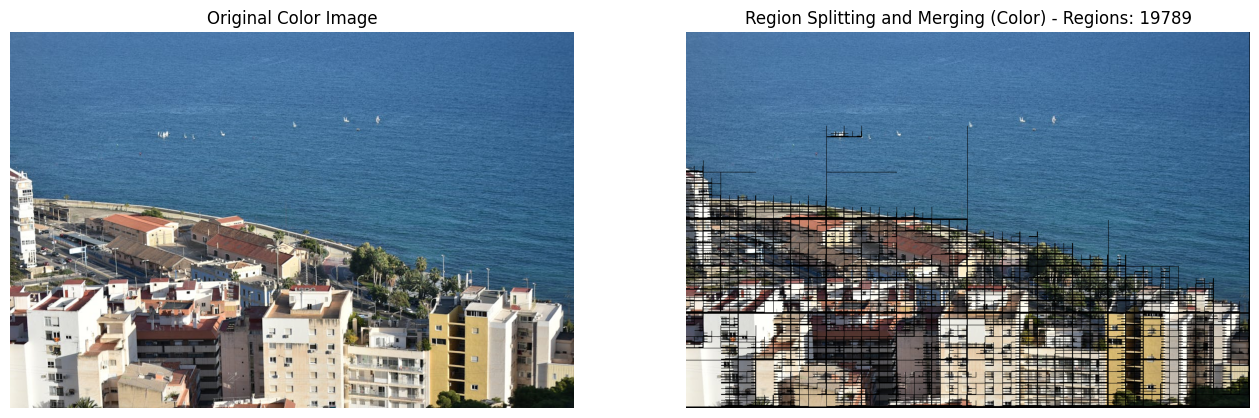

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

# Load the color image (BGR format)
image = cv2.imread('regionn.jpeg')

# Check if the image is loaded
if image is None:
    raise FileNotFoundError("Image not found! Make sure 'regionn.jpeg' is in the same directory.")

# Convert the image to RGB for better display in matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Optimized Region Splitting Function
def split_region_color(image, threshold=10):
    h, w, c = image.shape
    regions = []
    stack = deque([(0, 0, h, w)])  # Use deque for better performance

    while stack:
        x, y, h, w = stack.pop()
        region = image[x:x + h, y:y + w]

        if region.size == 0:
            continue

        mean = np.mean(region, axis=(0, 1))  # Mean color
        std = np.std(region, axis=(0, 1))    # Color variance

        # Avoid over-splitting by ensuring a minimum size
        if np.any(std > threshold) and h >= 4 and w >= 4:
            half_h, half_w = h // 2, w // 2
            stack.extend([
                (x, y, half_h, half_w),            # Top-left
                (x, y + half_w, half_h, half_w),   # Top-right
                (x + half_h, y, half_h, half_w),   # Bottom-left
                (x + half_h, y + half_w, half_h, half_w)  # Bottom-right
            ])
        else:
            regions.append((x, y, h, w, mean))

    return regions

# Optimized Region Merging Function
def merge_regions_color(image, regions, merge_threshold=15):
    merged_image = np.zeros_like(image, dtype=np.float32)

    for x, y, h, w, mean in regions:
        region = image[x:x + h, y:y + w]
        std = np.std(region, axis=(0, 1))

        # Dynamic merging based on region size relative to image size
        dynamic_threshold = merge_threshold * (h * w) / (image.shape[0] * image.shape[1])

        if np.all(std < dynamic_threshold):
            merged_image[x:x + h, y:y + w] = mean
        else:
            merged_image[x:x + h, y:y + w] = region

    return merged_image.astype(np.uint8)

# Perform region splitting
regions = split_region_color(image, threshold=15)

# Print the total number of regions
num_regions = len(regions)
print(f"Total Regions: {num_regions}")

# Perform region merging
merged_image = merge_regions_color(image, regions, merge_threshold=10)

# Convert merged image to RGB for display
merged_image_rgb = cv2.cvtColor(merged_image, cv2.COLOR_BGR2RGB)

# Display the original and merged images
plt.figure(figsize=(16, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Color Image')
plt.axis('off')

# Region Merged Image
plt.subplot(1, 2, 2)
plt.imshow(merged_image_rgb)
plt.title(f'Region Splitting and Merging (Color) - Regions: {num_regions}')
plt.axis('off')

plt.show()
